# Tech Company Merge and Acquisitions

This notebook is inspired by Kaggle's [Merger and Acquisitions by Tech Companies](https://www.kaggle.com/datasets/shivamb/company-acquisitions-7-top-companies) dataset. In this notebook, we will explore the Merger and Acquisitions data set as well as practice some data analysis and visualization skills.



## Merger and Acquisitions by Tech Companies Datasets

This dataset consists of the merger and acquisitions made by tech companies as of the year 2021. It contains the list of acquisitions made by the following companies:

```
Microsoft, Google, IBM, Hp, Apple, Amazon, Facebook, Twitter, eBay, Adobe, Citrix, Redhat, Blackberry, Disney
```

The attributes include the date, year, month of the acquisition, name of the company acquired, value or the cost of acquisition, business use-case of the acquisition, and the country from which the acquisition was made. The source of the dataset is Wikipedia, TechCrunch, and CrunchBase.

Interesting Tasks and Analysis Ideas
* Which company makes the acquisitions quickly
* What is the trend of business use-cases among the acquired companies throughout the years
* What can be forecasted for upcoming years in terms of acquisitions
* Predict who is likely to make next acquisitions and when

In [1]:
# Initialize workspace
!git clone https://github.com/LimJY03/DataVisualization.git

Cloning into 'DataVisualization'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 144 (delta 44), reused 113 (delta 17), pack-reused 0
Receiving objects: 100% (144/144), 13.34 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn color palette
sns.set_palette('husl', n_colors=14)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load data
data = pd.read_csv('./DataVisualization/Tech Company M&A/data/acquisitions_update_2021.csv', index_col='ID')
data

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...
1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"


Looking at the brief view of the dataset, we can define additional questions to be answered using our data. We will first answer the interesting tasks suggested by the dataset itself first.

Before we start answering the questions, we will need to process our data first by cleaning the data.

## Data Cleaning

As we can see from the data set, the column names are long and has spaces in between, let's rename them to ease our exploration.

In [3]:
data.columns = ['parent', 'year', 'month', 'acquired', 'business', 'country', 'price', 'category', 'products']
data

,parent,year,month,acquired,business,country,price,category,products
ID,,,,,,,,,
1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...
1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"


From the brief view of the data set, we can see that there are a lot of `-` that represents null values. Let's look at the null values in our dataset.

In [4]:
# Replace with NaN
data = data.replace('-', np.nan)

# Check null values
data.isnull().sum()

parent         0
year          28
month         58
acquired       0
business     274
country     1114
price        945
category    1445
products    1052
dtype: int64

We will expect the `price` column to contain the acquisition price in numeric format, but it might actually be in String format. So, let's look at the datatype for all columns in our dataset.

In [5]:
data.dtypes

parent      object
year        object
month       object
acquired    object
business    object
country     object
price       object
category    object
products    object
dtype: object

As expected, we will need to convert the `price` into numeric format using the `pandas.to_numeric()` function, setting the `errors` parameter to `'coerce'` so that the invalid parsing will be set as `NaN`.

We also can consider to convert the `year` into integer format using the `pandas.DataFrame.astype()` function. Since we have some `NaN` values in the column, we will convert the column into `'Int64'` datatype.

In [6]:
# Convert datatypes
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['year'] = data['year'].astype('Int64')

data.dtypes

parent       object
year          Int64
month        object
acquired     object
business     object
country      object
price       float64
category     object
products     object
dtype: object

We also realized that the price in our datasets can be converted into price in Billions to improve readability.

In [7]:
data['price'] /= 1_000_000_000

# Rename column
data.rename(columns={'price': 'price_billions'}, inplace=True)
data

,parent,year,month,acquired,business,country,price_billions,category,products
ID,,,,,,,,,
1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,NaN,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,NaN,NaN,"XenApp, XenDesktop"
1453,Citrix,2017,Jan,Unidesk,NaN,United States,NaN,NaN,"XenApp, XenDesktop"


Now that we have completed the basic data cleaning processes, we can start to explore our data and answer the suggested questions listed above.

---

## Question 1: Which company makes the acquisitions quickly?

To answer this question, we will need to determine the period between each acquisition by the company. Hence, we will create a new column that combines the `year` column and the `month` column to ease the calculations.

In [8]:
# Additional import
import calendar

In [9]:
# Drop null date values
time_data = data.dropna(subset=['year', 'month'])[['parent', 'year', 'month']]

# Set day to 1 for every month
time_data['day'] = 1

# Convert month to number
month_numeric = {v: k for k, v in enumerate(calendar.month_abbr)}
time_data['month'] = time_data['month'].map(month_numeric)

# Combine columns
time_data['date'] = pd.to_datetime(time_data[['year', 'month', 'day']])
time_data

,parent,year,month,day,date
ID,,,,,
1,Apple,1988,3,1,1988-03-01
2,Apple,1988,6,1,1988-06-01
3,Apple,1988,6,1,1988-06-01
4,Apple,1988,7,1,1988-07-01
5,Apple,1989,1,1,1989-01-01
...,...,...,...,...,...
1451,Citrix,2015,4,1,2015-04-01
1452,Citrix,2016,9,1,2016-09-01
1453,Citrix,2017,1,1,2017-01-01


We will group every parent company together and sort them. Then, we calculate the time difference between each acquisition by creating the `lag` column which refers to the date of the previous row for that `parent`.

Since we want to determine which company makes acquisitions quickly, we will need to calculate the acquisition rate with the formula below:

```
acquisition_rate = 1 acquisition / period between acquisition
```

If the period between acquisition is `0`, we will say that the `rate` is `1`, and if the time between is `NaT` for the first row of each `parent`, we will just set the `rate` to `0`.

In [10]:
# Sort date by parent company
time_data = time_data.groupby('parent', group_keys=False).apply(lambda x: x.sort_values(by='date'))

# Create lag column by parent company
time_data['lag'] = time_data.groupby('parent')['date'].shift(1)

# Calculate acquisition rate
time_data['rate'] = time_data['date'] - time_data['lag']
time_data['rate'] = time_data['rate'].astype(str).apply(lambda x: 0 if x == 'NaT' else 1 if ((time := int(x.split()[0])) == 0) else 1 / time)

# View transformation
time_data

,parent,year,month,day,date,lag,rate
ID,,,,,,,
1205,Adobe,1990,3,1,1990-03-01,NaT,0.000000
1206,Adobe,1990,6,1,1990-06-01,1990-03-01,0.010870
1207,Adobe,1992,6,1,1992-06-01,1990-06-01,0.001368
1208,Adobe,1992,6,1,1992-06-01,1992-06-01,1.000000
1209,Adobe,1994,8,1,1994-08-01,1992-06-01,0.001264
...,...,...,...,...,...,...,...
184,Twitter,2020,12,1,2020-12-01,2020-05-01,0.004673
185,Twitter,2021,1,1,2021-01-01,2020-12-01,0.032258
186,Twitter,2021,1,1,2021-01-01,2021-01-01,1.000000


After we have calculated the rate for each acquisition for each company, we can find the average acquisition rate for each company and visualize to see which company has the highest acquisition rate, i.e. the company that makes the acquisitions quickly, as an answer to our question for this section.

Text(0, 0.5, 'Parent Company')

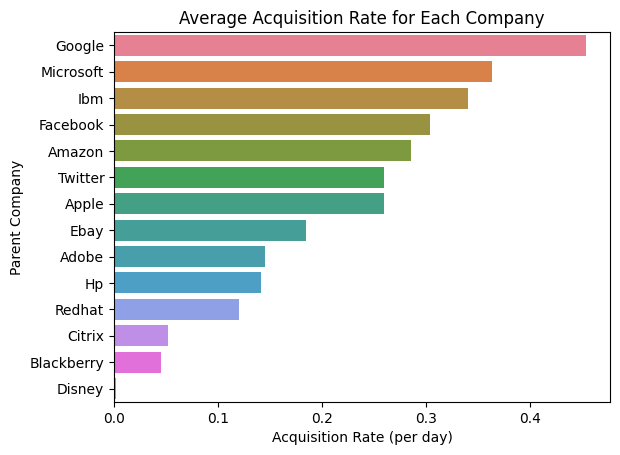

In [11]:
# Get average acquisition rate and sort in descending order
question1 = pd.DataFrame(time_data.groupby('parent', group_keys=False)['rate'].mean().sort_values(ascending=False))

# Visualise average acquisition rate for each company
sns.barplot(data=question1, x='rate', y=question1.index)
plt.title('Average Acquisition Rate for Each Company')
plt.xlabel('Acquisition Rate (per day)')
plt.ylabel('Parent Company')

From the graph above, we can see that **Google** has the highest average acquisition rate, followed by Microsoft, IBM, Facebook and Amazon.

---

## Question 2: What is the trend of business use-cases among the acquired companies throughout the years?

For this question, we will be using the `business` column most of the time since it contains the information (use-cases) that we want to answer this question.

We can just do a simple "word cloud" to analyse and see which word occurs the most in the `business` columns, but since the question wants us to look for the trends, we can include some time-series graphing as well to better visualize the result.

In [12]:
# Additional import
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
business_data = data.dropna(subset=['year', 'business'])[['year', 'business']]

# Convert text into lower case
business_data['business'] = business_data['business'].str.lower()

# Show transformation
business_data

,year,business
ID,,
1,1988,software
2,1988,computer software
3,1988,computer software
4,1988,computer software
5,1989,computer software
...,...,...
1450,2015,storage virtualization
1451,2015,telephone services
1452,2016,uem and application performance optimization


While dealing with natural language, it is unavoidable that there are some words that does not bring out any meaning. Hence, we will use the Tf-Idf ([Term Frequency Inverse Term Frequency](https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/)) method to extract the words that are useful only.

In [14]:
# Use Tf-Idf to extract useful words
vectorizer = TfidfVectorizer()
_ = vectorizer.fit_transform(business_data['business'])

# Get list of useful words
useful_words = vectorizer.get_feature_names_out()

After we have extracted the list of useful words, we can then count the frequency of the useful words for every year.

Our `business` column is a string of multiple words, we can split each string into a list of words using the `pandas.DataFrame.str.split()` method. We realized that there are several words that bring the same meaning, so we will replace the words with the same meaning to the same words.

Now the `business` column is a list of string of words, we can use the `pandas.DataFrame.explode()` method on this column to make each word in the list have its own row. We can then count its occurence in this year by grouping it with year and itself, then use the `size()` method to determine the number of occurences.

Even after using Td-Idf method to remove useless words, we still have some prepositions and other words that we don't want to include in the `business` column, so we will just filter out those words manually.

In [15]:
def replace(row_arr: list[str]) -> list[str]:

    result = []

    for word in row_arr:

        if word == 'artificial': word = 'ai'
        elif word == 'services': word = 'service'
        elif word == 'augmented': word = 'ar'
        elif word == 'virtual': word = 'vr'

        result.append(word)

    return result

# Replace words with similar meaning
business_data['business'] = business_data['business'].str.split().apply(replace)

# Count words by grouping with year and words
business_data = business_data.explode('business').groupby(['year', 'business']).size().reset_index(name='count')

# Keep only useful words
business_data = business_data[business_data['business'].isin(useful_words)]

# Remove other unfiltered words
business_data = business_data[~business_data['business'].isin(['and', 'or', 'to', 'for', 'in', 'of', 'acquisition'])]

# Show transformation
business_data

,year,business,count
0,1958,plotter,1
1,1959,flight,1
2,1959,instrumentation,1
3,1959,test,1
4,1961,equipment,1
...,...,...,...
2016,2021,technology,2
2018,2021,tool,1
2019,2021,transformations,1
2020,2021,use,2


To make our data more sensible, we will pivot the table to make the `year` column to be the columns of the pivot table.

In [16]:
# Pivot data to better view acquisition count
pivot_table = business_data.pivot(index='business', columns='year', values='count').fillna(0).astype('Int64')

First of all, let us look at the top 10 trending business use cases of the acquired companies for latest *N* years with a bar chart. To ease ourselves in defining the value *N* for different visualizations, we can define our own function.

In [17]:
def plot_total_usecases(n: int = 42) -> plt:

    # Segment usecases by latest n years
    trending_usecases = pivot_table.iloc[:, -n:]

    # Find total acquisition for each business use case
    trending_usecases['usecases'] = trending_usecases.sum(axis=1).astype('Int64')

    # Sort use case in descending order by number of acquisitions
    trending_usecases = trending_usecases.sort_values(by='usecases', ascending=False).iloc[:10]

    # Visualize trending all time use-cases
    sns.barplot(data=trending_usecases, x='usecases', y=trending_usecases.index)
    plt.title(f'Top 10 Trending Use-Cases in {pivot_table.columns[-n]} - 2021')
    plt.xlabel('Number of Acquisitions')

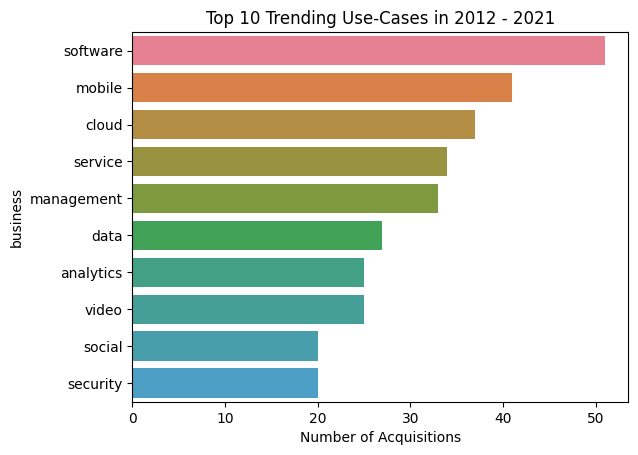

In [18]:
plot_total_usecases(10)

From the bar chart above, we can see that **software** has the highest number of acquisitions throughout the latest 10 years (2012 - 2021), followed by mobile and cloud.

Now, let us visualise in detail the trend for these use-cases throughout the latest 10 years with a line chart.

In [19]:
def plot_trend_usecases(n: int = 42) -> plt:

    # Segment usecases by latest n years
    usecase_trends = pivot_table.iloc[:, -n:]

    # Find total acquisition for each business use case
    usecase_trends['usecases'] = usecase_trends.sum(axis=1).astype('Int64')

    # Sort use case in descending order by number of acquisitions
    usecase_trends = usecase_trends.sort_values(by='usecases', ascending=False).iloc[:10, :-1]

    # Visualize trending all time use-cases
    usecase_trends.T.plot(kind='line')
    plt.title(f'Number of Acquisitions in {pivot_table.columns[-n]} - 2021')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

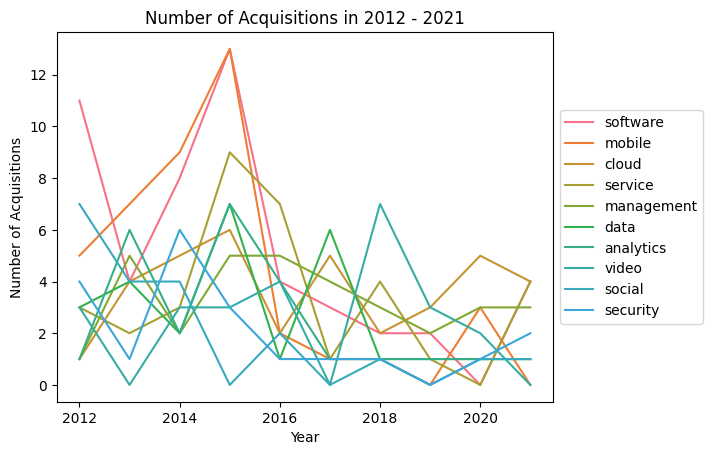

In [20]:
plot_trend_usecases(10)

Alternatively, we can also plot a "Line of Best Fit" for us to see the basic trend of each use-case using the `numpy.polyfit()` method to obtain the parameters and the `numpy.poly1d()` method to generate the best fit line function.

In [21]:
def plot_trendbestfit_usecases(n: int = 42) -> plt:

    # Segment usecases by latest n years
    usecase_trends = pivot_table.iloc[:, -n:]

    # Find total acquisition for each business use case
    usecase_trends['usecases'] = usecase_trends.sum(axis=1).astype('Int64')

    # Sort use case in descending order by number of acquisitions
    usecase_trends = usecase_trends.sort_values(by='usecases', ascending=False).iloc[:10, :-1]

    # Generate x, y values
    x = np.array(list(map(int, usecase_trends.columns)))
    y = usecase_trends.values.tolist()

    # Look at line of best fit to see trends
    for i, usecase in enumerate(usecase_trends.index):

        f = np.poly1d(np.polyfit(x, y[i], 1))
        plt.plot(x, f(np.array(x)), label=usecase)

    plt.title(f'Line of Best Fit for Number of Acquisitions in {pivot_table.columns[-n]} - 2021')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

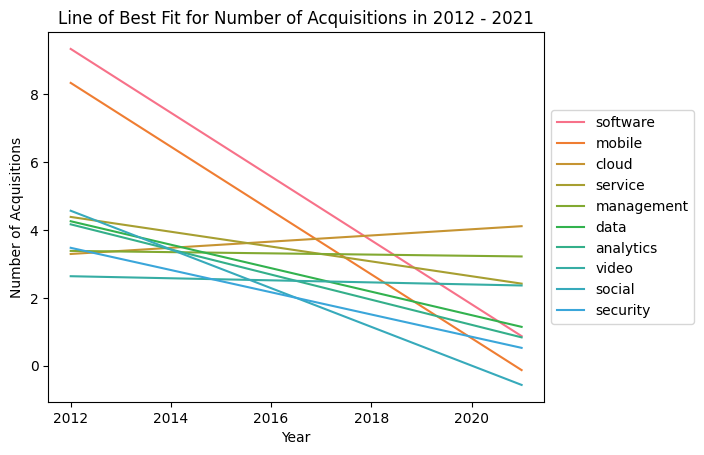

In [22]:
plot_trendbestfit_usecases(10)

From the first graph, we can see that the number of acquisitions for **software** and **mobile** spiked around the year 2015, where **data**, **analytics** and **services** also spiked around this year. Just before the pandemic starts (2020), we can see that the number of acquisitions for  **cloud** is the highest, indicating that **cloud** has slowly becoming a trending use case commonly acquired by tech companies.

From the second graph, the line of best fit also shows that the general trend for **cloud** is increasing, in fact it is the only one that shows significant increase throughout this 10 years. The **management** and **video** use-case however remains almost steadily throughout these 10 years, so we can say that the importance of management-related use-cases is consistent throughout the 10 years.

We can see that the general trend for both **software** and **mobile** have a steep decrease in the second graph. Unlike **mobile**, although the general trend of **software** is a steep decrease, but we can see from the first graph that it drops to its lowest at 2020 and rises back to be as much of **cloud** in the 2021. This might mean that the pandemic promotes software development as everyone was working from home.

---

## Question 3: What can be forecasted for upcoming years in terms of acquisitions

To answer this question, we can just look at the graphs generated in Question 2 and see the trends and patterns in the graph. We can assume that the acquisition for **cloud** use-case will continue to increase steadily in the upcoming years, and the acquisition for **mobile** use-case will slowly diminished as compared to **software** use-cases.

However, let's validate our answer by using calculating the correlation between the business use-case and the year, to see which use-case has a strong correlation with the year, and if they have positive or negative relationships. Since we already created the `pivot_table` in Question 2, we will be utilizing it here, and visualize the correlations with a bar chart.



Text(0, 0.5, 'Business Use-Case')

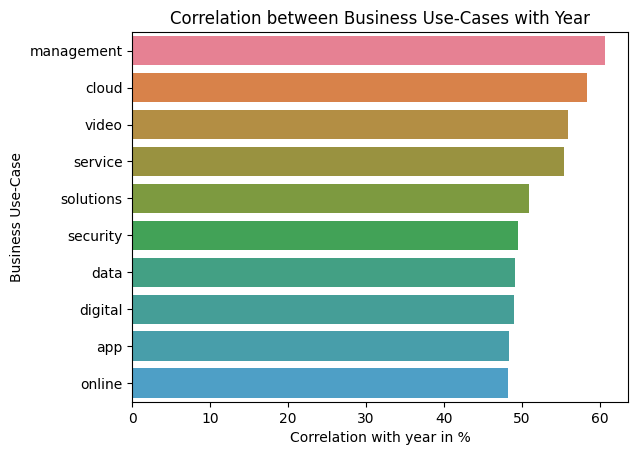

In [23]:
# Copy data from pivot table
correlation_table = pivot_table[pivot_table.columns].T
correlation_table['year'] = pivot_table.columns

# Find correlation and sort in descending order by the correlation value to get top 10 (excluding itself)
question3 = correlation_table.corr().sort_values(by='year', ascending=False)[['year']].iloc[1:].reset_index().iloc[:10]
question3.columns = ['business', 'correlation%']
question3.columns.name = None

# Convert correlation to percentage
question3['correlation%'] = question3['correlation%'] * 100

# Plot correlation
sns.barplot(data=question3, x='correlation%', y='business')
plt.title('Correlation between Business Use-Cases with Year')
plt.xlabel('Correlation with year in %')
plt.ylabel('Business Use-Case')

From the bar chart above, we can see that **management** has the highest correlation with year. The **cloud**, **video** and **service** use-cases also have significantly higher correlation than the other 6 use-cases in the bar chart. Hence, we can infer that **management**, **cloud**, **video** and **service** will be the future trend of acquisitions by tech companies.

We can dive deeper into each business use-cases and see how they are correlated with other business use-cases, so we can predict that those closely-related business use-cases will have higher or lower acquisitions together. Let's look at **cloud** since it is the only use-case with increasing trend from the general trend graph in Question 2.

Text(0, 0.5, 'Business Use-Case')

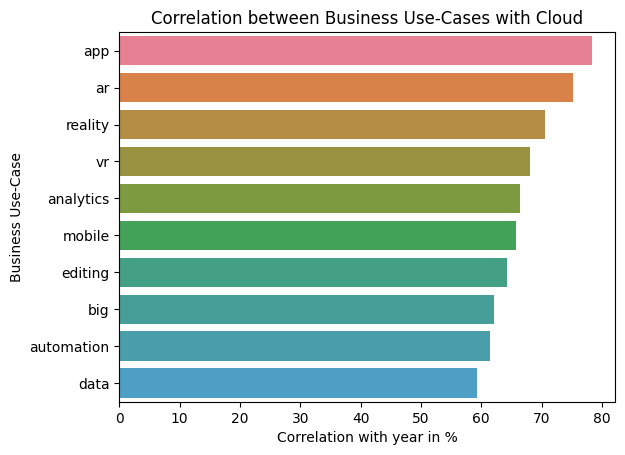

In [24]:
cloud_corr = correlation_table.corr().sort_values(by='cloud', ascending=False)[['cloud']].iloc[1:].reset_index().iloc[:10]
cloud_corr.columns = ['business', 'correlation%']
cloud_corr.columns.name = None

# Convert correlation to percentage
cloud_corr['correlation%'] = cloud_corr['correlation%'] * 100

# Plot correlation
sns.barplot(data=cloud_corr, x='correlation%', y='business')
plt.title('Correlation between Business Use-Cases with Cloud')
plt.xlabel('Correlation with year in %')
plt.ylabel('Business Use-Case')

From the bar chart above, we see that the **app**, **vr**, **ar** and **analytics** (consider **reality** to fall under **vr** and **ar**) has the highest correlation with **cloud** use-case. Hence, we can infer that **app**, **ar**, **vr** and **analytics** will trend along with **cloud**.

---

## Question 4: Predict who is likely to make next acquisitions and when

An intuitive way to answer this question is to use machine learning and predictive model to predict the most likely company to make an acquisition. However, we are going to tackle this problem using basic statistics.

The approach here is to generate a sampling of the acquisition of each company for 10 months after their last acquisition available in the dataset based on their probability of acquisition per month.

In [25]:
# Calculate number of acquisitions for each parent company
prob_acquisition = time_data.groupby('parent').size().reset_index(name='acquisition_count')

# Calculate number of unique years of acquisitions
prob_acquisition['unique_years'] = list(time_data.groupby('parent')['year'].nunique())

# Calculate probability of acquisition per month
prob_acquisition['prob_per_month'] = prob_acquisition['acquisition_count'] / (prob_acquisition['unique_years'] * 12)

# Show transformation
prob_acquisition

,parent,acquisition_count,unique_years,prob_per_month
0,Adobe,51,26,0.163462
1,Amazon,106,21,0.420635
2,Apple,114,23,0.413043
3,Blackberry,32,13,0.205128
4,Citrix,51,20,0.212500
5,Disney,11,10,0.091667
6,Ebay,63,22,0.238636
7,Facebook,93,16,0.484375
8,Google,243,20,1.012500
9,Hp,93,29,0.267241


Let's visualize the calculated Monthly Acquisition Probability for each 14 parent companies in our dataset using a bar chart.

Text(0, 0.5, 'Parent Company')

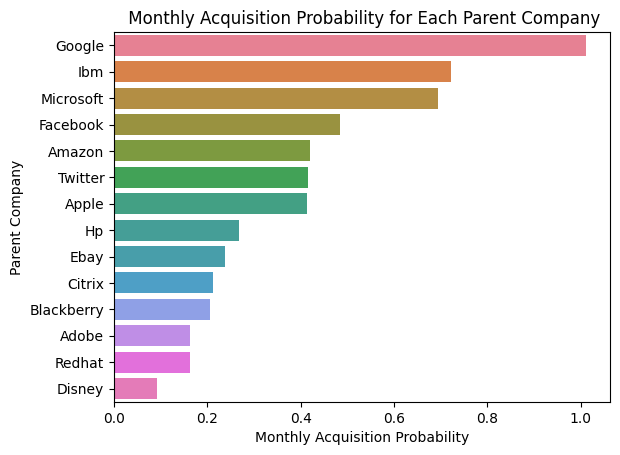

In [26]:
prob_acquisition = prob_acquisition.sort_values(by='prob_per_month', ascending=False)

# Plot average acquisition per month
sns.barplot(data=prob_acquisition, x='prob_per_month', y='parent')
plt.title(' Monthly Acquisition Probability for Each Parent Company')
plt.xlabel('Monthly Acquisition Probability')
plt.ylabel('Parent Company')

From the bar chart above, we can see that **Google**'s "probability" of monthly acquisition is about 1.0 which indicates that it is expected to have about 1 acquisition every month.

We will first determine the start month for our prediction by taking the latest acquisition date in our dateset.

In [27]:
max(time_data['date']).date()

datetime.date(2021, 10, 1)

Since our latest acquisition date available in the dataset is October 2021, we will start to generate a simulation using random sample to predict the acquisition for each company for the next 12 months and plot it in a stacked bar chart below.

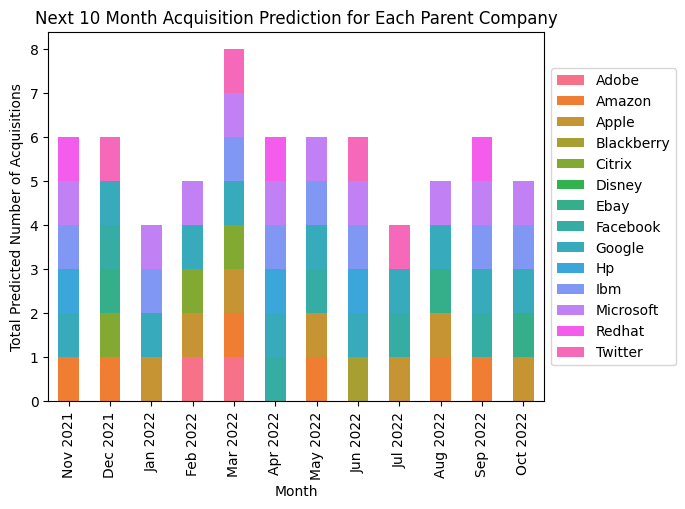

In [28]:
# Random sampling generator
sampler = np.random.default_rng(seed=17)

# Create sampling table for 10 months for each parent company
question4_table = pd.DataFrame(np.zeros((14, 12)), columns=['Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022'])
question4_table.index = time_data['parent'].unique()

for month in question4_table.columns:
    question4_table[month] = list(prob_acquisition.sort_values(by='parent')['prob_per_month'].apply(lambda x: int(sampler.random() <= x)))

# Visualize acquisition distribution
question4_table.T.plot(kind='bar', stacked=True)
plt.title('Next 10 Month Acquisition Prediction for Each Parent Company')
plt.xlabel('Month')
plt.ylabel('Total Predicted Number of Acquisitions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

From the prediction from the chart above, we can see that **Microsoft**, **HP**, **Google**, **Ebay**, **Blackberry** and **Apple** is predicted to make an acquisition for the subsequent month **(November 2021)** from the latest month available in the dataset.

---

Now we have completed answering the interesting tasks suggested by the dataset itself. We can start to define our own question and continue exploring the dataset.

Some additional questions that might be useful for us to explore the data are:
* What are the top 10 most expensive acquisitions?
* What is the trend of acquisition over the years?
* Is there a particular month where companies perform acquisition?
* Which derived products are the most common from the acquisitions?

Let's look at the initially cleaned DataFrame `data` and see how we can use it to answer the additional questions above.

In [29]:
data

,parent,year,month,acquired,business,country,price_billions,category,products
ID,,,,,,,,,
1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,NaN,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,NaN,NaN,"XenApp, XenDesktop"
1453,Citrix,2017,Jan,Unidesk,NaN,United States,NaN,NaN,"XenApp, XenDesktop"


---

## Additional Question 1: What are the top 10 most expensive acquisitions?

To answer this question, we will just sort the `price_billions` column of our `data` DataFrame and return the top 10 highest price acquisitions.

(0.0, 84.865)

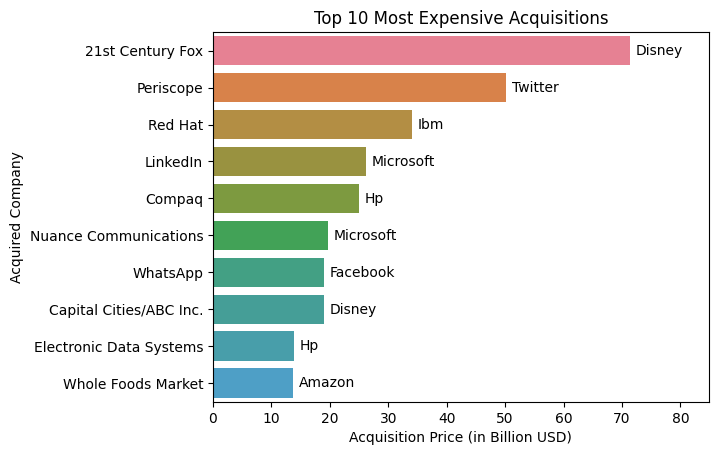

In [30]:
# Sort the dataframe
additional_question1 = data.sort_values(by='price_billions', ascending=False).iloc[:10]

# Visualize the top 10 most expensive acquisitions
sns.barplot(data=additional_question1, x='price_billions', y='acquired')
plt.title('Top 10 Most Expensive Acquisitions')
plt.xlabel('Acquisition Price (in Billion USD)')
plt.ylabel('Acquired Company')

# Label which company make these acquisitions
for i, price in enumerate(additional_question1['price_billions']):
    plt.text(x=price + 1, y=i, s=additional_question1['parent'].iloc[i], va='center')

# Adjust chart bounding box
_, xmax = plt.xlim()
plt.xlim(xmax=xmax + 10)

From the bar chart above, we can see that **21st Century Fox** has the highest acquisition price acquired by Disney. Other than that, Disney also acquired Capital Cities/ABC Inc. which is the 8th most expensive acquisition in the dataset.

Although there are several companies like Microsoft and Hp did have 2 acquisitions among the top 10 most expensive acquisitions in our dataset, the 21st Century Fox acquisition alone is already more than 2 times of each of the acquisitions by these companies. Hence we can expect that Disney has paid the highest price in acquiring other companies up to October 2021.

We can validate this by plotting the graph of total acquisition prices for each parent company.

Text(0, 0.5, 'Parent Company')

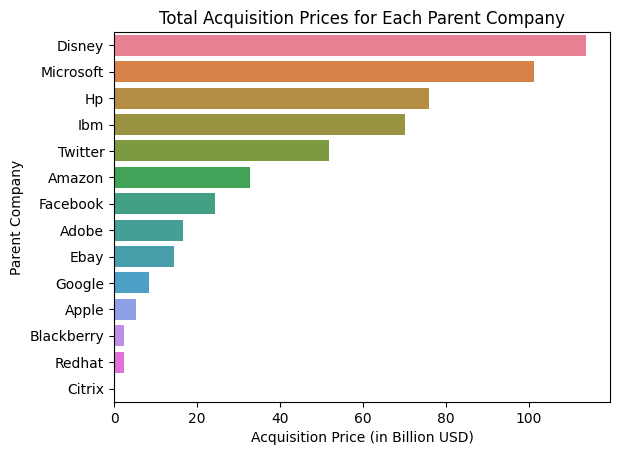

In [31]:
parent_total_acquisition = data.groupby('parent')['price_billions'].sum().reset_index()
parent_total_acquisition = parent_total_acquisition.sort_values(by='price_billions', ascending=False)

# Visualize total acquisition prices
sns.barplot(data=parent_total_acquisition, x='price_billions', y='parent')
plt.title('Total Acquisition Prices for Each Parent Company')
plt.xlabel('Acquisition Price (in Billion USD)')
plt.ylabel('Parent Company')

Unsurprisingly, **Disney** paid the highest Acquisition Price (in Billion USD) in acquiring other companies according to the data available in our dataset up to October 2021.

---

## Additional Question 2: What is the trend of acquisition over the years?

We can break this question into two parts:
* What is the trend of **number of acquisitions** over the years?
* What is the trend of **acquisition prices** over the years?

We can answer the trend of **number of acquisitions** over the years and visualize that easily by grouping the data rows according to the `year` column and count the number of rows for each year using the `size()` method.

Similarly, we can answer the trend of **acquisition prices** over the years by grouping the data rows according to the `year` column and sum the total prices for each year. We will plot the line graph on the same plot.

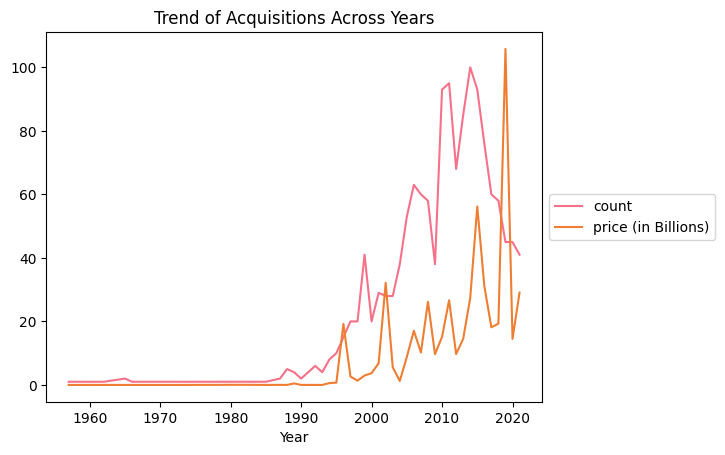

In [32]:
additional_question2 = data.groupby('year').size().reset_index(name='count')
additional_question2['year'] = additional_question2['year'].astype('int64')
additional_question2['total_acq_price'] = list(data.groupby('year')['price_billions'].sum())
additional_question2

# Visualize acquisition count across years
sns.lineplot(data=additional_question2, x='year', y='count', label='count')
sns.lineplot(data=additional_question2, x='year', y='total_acq_price', label='price (in Billions)')
plt.title('Trend of Acquisitions Across Years')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

From the line chart above, we can see that the number of acquisitions starts to increase exponentially around the late 20th century where the [Third Industrial Revolution](https://en.wikipedia.org/wiki/Digital_Revolution) starts, and spikes around 2015 where the [Fourth Industrial Revolution](https://www.twi-global.com/what-we-do/research-and-technology/technologies/industry-4-0) starts.

However, we can see the price trend spikes around 2019, one intuitive reasoning of this is that the acquisition of **21st Century Fox** by **Disney** might be happening in this year. We can confirm it by listing the top expensive acquisitions in 2019.

<Axes: xlabel='price_billions', ylabel='acquired'>

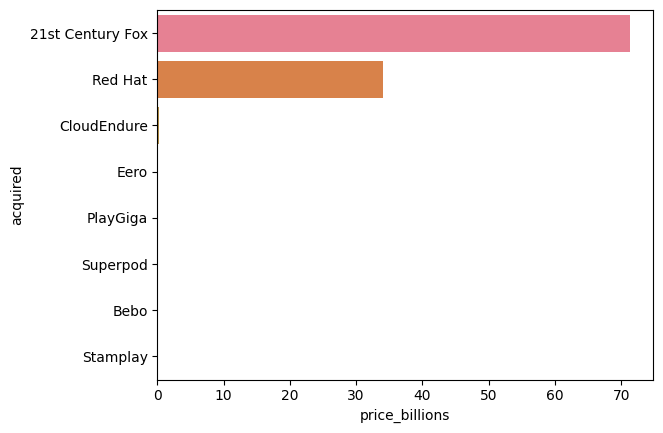

In [33]:
sns.barplot(data=data[(data['year'] == 2019) & (data['price_billions'] > 0)].sort_values(by='price_billions', ascending=False), x='price_billions', y='acquired')

As expected, **21st Century Fox** was acquired in this year, along with **Red Hat** which is the 3rd most expensive acquisitions in the dataset, also done in year 2019.

---

## Additional Question 3: Is there a particular month where companies perform acquisition?

We can answer this question by analyzing the number of acquisition for each month and see if there is a pattern going on. We can start by looking at the overall distribution across months.

Text(0, 0.5, 'Number of Acquisitions')

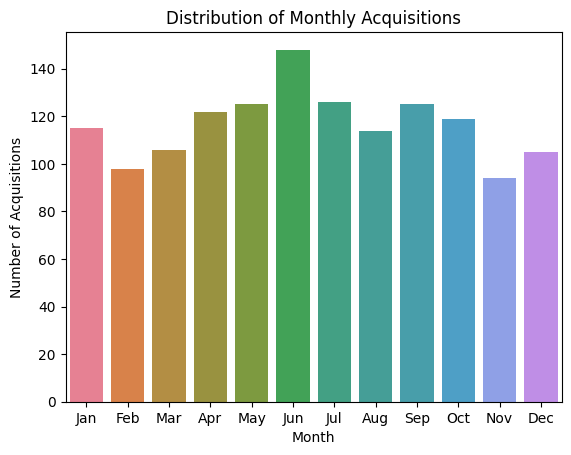

In [34]:
additional_question3 = data.groupby('month').size().reset_index(name='count')
additional_question3['month_num'] = pd.to_datetime(additional_question3['month'], format='%b').dt.month
additional_question3 = additional_question3.sort_values(by='month_num')

# Visualize the distribution
sns.barplot(data=additional_question3, x='month', y='count')
plt.title('Distribution of Monthly Acquisitions')
plt.xlabel('Month')
plt.ylabel('Number of Acquisitions')

From the bar chart above, looks like companies are more likely to make acquisitions around **June**, or around the middle year, let us explore further by grouping the months into year quarters and see which quarter has the highest acquisitions.

Text(0, 0.5, 'Number of Acquisitions')

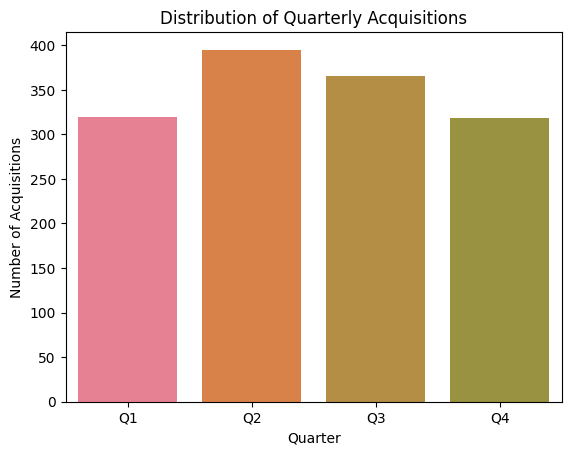

In [35]:
# Distribution by year quarters
quarter_dist = additional_question3[['month_num', 'count']]
quarter_dist['quarter'] = np.ceil(quarter_dist['month_num'] / 3).apply(lambda x: f'Q{int(x)}')
quarter_dist = quarter_dist.groupby('quarter')['count'].sum().reset_index(name='count')

# Visualize quarterly acquisition distribution
sns.barplot(data=quarter_dist, x='quarter', y='count')
plt.title('Distribution of Quarterly Acquisitions')
plt.xlabel('Quarter')
plt.ylabel('Number of Acquisitions')

As what we expect, **Quarter 2** has the highest number of acquisitions in total. However, we can see that both monthly distribution and quarterly distribution bar charts have fairly distributed heights, so we can hypothesize that there might not be a strong correlation for the time to make an acquisition.

We can verify this by plotting the trend of monthly acquisitions over the years. Since there are quite less acquisitions before 2000 from **Additional Question 2** where we visualized the trend of acquisition across the years, we will only take the monthly acquisitions from 2000 onwards and plot the trend in the line graph below.

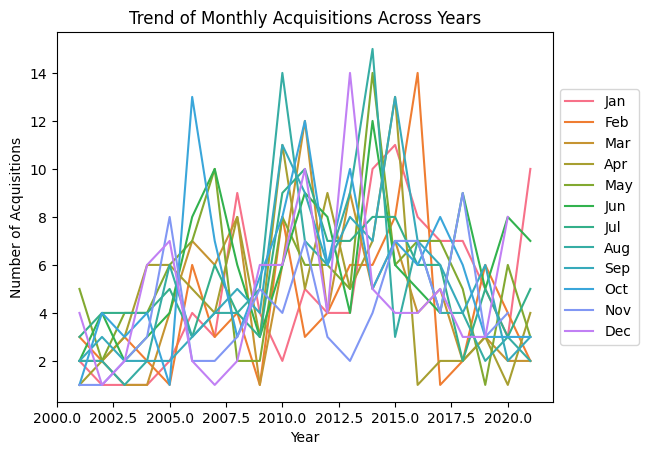

In [36]:
monthly_acquisition_trend = data.groupby(['year', 'month']).size().reset_index(name='count')
monthly_acquisition_trend['month_num'] = pd.to_datetime(monthly_acquisition_trend['month'], format='%b').dt.month
monthly_acquisition_trend['year'] = monthly_acquisition_trend['year'].astype('int64')
monthly_acquisition_trend = monthly_acquisition_trend[monthly_acquisition_trend['year'] > 2000]
monthly_acquisition_trend = monthly_acquisition_trend.sort_values(by='month_num')

# Visualize monthly acquisition trends across years
sns.lineplot(data=monthly_acquisition_trend, x='year', y='count', hue='month')
plt.title('Trend of Monthly Acquisitions Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Acquisitions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

From the line graph above we are unable to see any clear trends for the monthly acquisition across the years, we can therefore verify that there is no correlation for the time to make an acquisitions.

---

## Additional Question 4: Which derived products are the most common from the acquisitions?

To answer this question, we can just count the occurences of each derived products from the `product` column and we will visualize the top 10 most common derived products.

We can do that by using the similar strategy in **Question 2**. However, unlike that in **Question 2** where we obtain the words by separating them from spaces, here we see that the derived products are separated by comma, so we will be using the `str.split(',')` method instead.

Text(0, 0.5, 'Derived Products')

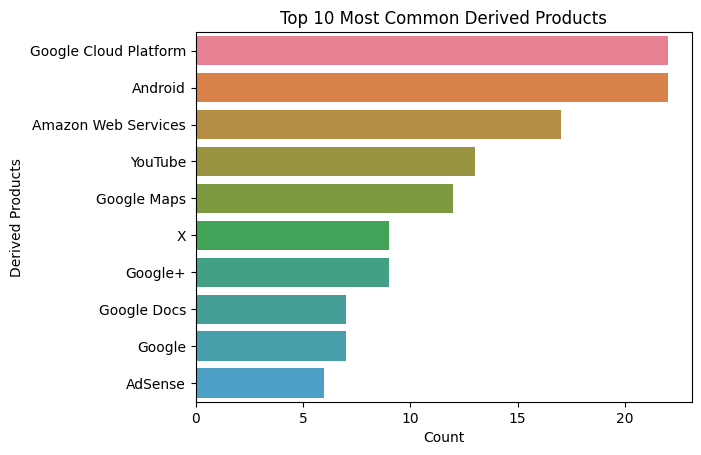

In [37]:
additional_question4 = data.dropna(subset=['products'])[['products']]

# Count unique product occurences
additional_question4['products'] = additional_question4['products'].str.split(',')
additional_question4 = additional_question4.explode('products').groupby('products').size().reset_index(name='count')
additional_question4 = additional_question4.sort_values(by='count', ascending=False)

# Visualize top 10 most common derived products
sns.barplot(data=additional_question4.iloc[:10], x='count', y='products')
plt.title('Top 10 Most Common Derived Products')
plt.xlabel('Count')
plt.ylabel('Derived Products')

From the bar chart above, we can see that the 2 most common derived products are **Google Cloud Platform** and **Android**. Moreover, we can see that 8 out of these 10 (all except Amazon Web Services and X) most common derived products are owned by Google, which aligns with our findings from **Question 1** where we found out that Google has the highest acquisition rate, indicating that Google is making acquisitions in short intervals for a period of time.

---

# Conclusion

In this notebook, we have gone through the basic data cleaning steps to transform and prepare our data for analysis using the Pandas library.

Moreover, we have successfully analyze the data and visualize them with appropriate graphs using the Seaborn and Matplotlib library. With these graphs, we are able to answer the 4 interesting questions suggested by the dataset itself.

While answering the suggested interesting questions, we want to explore our data more and we created 4 additional questions which are then answered with our data analysis skills.